In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context("paper", font_scale=1.6)
sns.set_style('whitegrid')


index = pd.read_csv('GPF_Index.csv')

/home/bikash/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [209]:
times1 = []
for i in range(10):
    
    for j in range(6):
        times1.append('{}h {}min'.format(i, j*10))
times1[:43][-1]

'7h 0min'

#### First file

In [210]:
f1 = pd.read_excel('TIsigner_m_scralet_GFP_first test set.xlsx', sheet_name='Sheet2')
f1 = f1[f1['Unnamed: 0'] == 'induced']
f1 = f1[f1.columns[1:]]
f1.head(2)

,Sample,Expression score,Raw Data (600 1),Raw Data (600 1).1,Raw Data (600 1).2,Raw Data (600 1).3,Raw Data (600 1).4,Raw Data (600 1).5,Raw Data (600 1).6,Raw Data (600 1).7,...,Raw Data (584 3).35,Raw Data (584 3).36,Raw Data (584 3).37,Raw Data (584 3).38,Raw Data (584 3).39,Raw Data (584 3).40,Raw Data (584 3).41,Raw Data (584 3).42,Raw Data (584 3).43,Raw Data (584 3).44
49,202,5.78,0.16,0.161,0.168,0.177,0.193,0.209,0.238,0.261,...,65728,71008,74470,79249,84330,89578,93744,99087,105028,109812
50,202,NaN,0.175,0.174,0.181,0.193,0.212,0.278,0.361,0.431,...,67594,71628,76278,80958,85956,90231,94522,100116,106631,114020


In [297]:
aa = f1[[i for i in aver_f1.columns.values if '485' in i][:43]]

for i in aa.columns:
    if    (aa[i] == 260000).any():
        print(pd.read_excel('TIsigner_m_scralet_GFP_first test set.xlsx', sheet_name='Sheet2')[i])
        break
    

0     5 h 20 min
1         145221
2         148332
3         148302
4         148871
         ...    
80        253888
81        251902
82        256340
83        256802
84        257642
Name: Raw Data (485-12 2).32, Length: 85, dtype: object


In [211]:
map1 = f1[['Sample', 'Expression score']].dropna().reset_index(drop=True)
map1.head()

,Sample,Expression score
0,202,5.78
1,203,7.07
2,204,9.67
3,206,33.20
4,207,37.81


In [213]:
aver_f1 = f1.groupby('Sample').apply(np.mean)
gfp1 = aver_f1[[i for i in aver_f1.columns.values if '485' in i][:43]] #taking upto 7hr only
rfp1 = aver_f1[[i for i in aver_f1.columns.values if '584' in i][:43]]
gfp1.columns = times1[:len(gfp1.columns)]
rfp1.columns = times1[:len(rfp1.columns)]

normalised0 = gfp1/rfp1
normalised0 = normalised0.reset_index()
normalised0 = normalised0.merge(map1, on='Sample')
normalised0 = normalised0.rename(columns={'Sample':'Content'})
normalised0

,Content,0h 0min,0h 10min,0h 20min,0h 30min,0h 40min,0h 50min,1h 0min,1h 10min,1h 20min,...,5h 40min,5h 50min,6h 0min,6h 10min,6h 20min,6h 30min,6h 40min,6h 50min,7h 0min,Expression score
0,202,55.699677,55.298342,53.662871,51.769084,50.138389,46.822350,43.269602,40.803218,37.298759,...,3.318780,3.128795,2.962476,2.805057,2.670272,2.515089,2.416136,2.315468,2.198334,5.78
1,203,53.920984,52.819458,52.698264,49.835445,47.374793,45.542895,42.941032,39.383384,36.654656,...,4.513180,4.275956,4.058014,3.875326,3.647063,3.446387,3.226347,3.027217,2.833487,7.07
2,204,58.494014,55.568134,53.505470,53.782025,51.222835,48.226755,45.480693,41.520458,39.644434,...,3.551641,3.272976,3.118806,2.937835,2.790906,2.666298,2.535759,2.404602,2.285556,9.67
3,206,55.728279,52.614194,52.495268,50.142390,47.437821,45.324098,42.827042,39.946406,36.778193,...,13.986154,13.456396,13.189489,12.819459,12.475808,12.007019,11.797268,11.433597,11.125057,33.20
4,207,54.789042,54.948288,54.476210,51.420371,49.473613,45.808828,43.620672,41.160583,37.515093,...,12.609161,12.328077,12.028641,11.764037,11.564807,11.126961,10.918559,10.543105,10.337972,37.81
5,216,55.774961,54.220763,52.231311,50.804799,48.103604,46.570398,43.789361,41.333197,37.675099,...,11.630705,11.173001,10.637290,10.364484,9.953042,9.542452,9.226511,8.833922,8.488687,97.75
6,220,54.876599,55.152985,52.650188,50.471072,49.105803,46.019998,44.596886,40.720570,38.476647,...,8.159979,7.749517,7.434347,7.049990,6.738928,6.391138,6.086807,5.733523,5.387931,12.12
7,222,52.252916,52.228339,50.658401,47.759845,46.217368,43.717269,39.922095,37.830326,34.792269,...,9.332455,8.962653,8.619737,8.160191,7.860130,7.496828,7.211405,6.876427,6.534688,21.09
8,223,56.110269,58.528396,54.436850,54.703979,52.312245,49.706140,47.226391,42.833998,40.713312,...,11.988140,11.571299,11.063465,10.771695,10.471345,10.069453,9.582780,9.136485,8.847349,21.95
9,232,62.951791,61.380448,60.549213,59.014732,57.714617,55.717966,52.870737,48.825521,47.123018,...,17.868308,17.342081,17.018536,16.663093,16.194226,15.765687,15.585524,15.087895,14.409535,60.55


#### Second file

In [214]:
df_gfp = pd.read_excel('2TIsigner_m_scralet_GFP_first test repeat plus additional.xlsx', sheet_name='GFP_')
df_rfp = pd.read_excel('2TIsigner_m_scralet_GFP_first test repeat plus additional.xlsx', sheet_name='RFP_')

In [298]:
aa = f1[[i for i in df_gfp.columns.values if '485' in i][:43]]

for i in aa.columns:
    if    (aa[i] == 260000).any():
        print(pd.read_excel('2TIsigner_m_scralet_GFP_first test repeat plus additional.xlsx', sheet_name='GFP_')[i])
        break

0        320
1     194441
2     185864
3     190217
4     218893
       ...  
83    129530
84    128424
85    130245
86    129442
87    130461
Name: Raw Data (485-12 2).32, Length: 88, dtype: int64


In [299]:
320/60

5.333333333333333

In [215]:
mean_gfp = pd.DataFrame(columns=times1[:len(df_gfp.columns[2:])])

for i, v in enumerate(df_gfp.columns[2:]):
    try:
        mean_gfp.loc[:, times1[i]] = df_gfp.loc[1:].groupby(['Content'])[v].apply(np.mean)
    except Exception:
        print(v)

mean_rfp = pd.DataFrame(columns=times1[:len(df_rfp.columns[2:])])

for i, v in enumerate(df_rfp.columns[2:]):
    try:
        mean_rfp.loc[:, times1[i]] = df_rfp.loc[1:].groupby(['Content'])[v].apply(np.mean)
    except Exception:
        print(v)

In [220]:
normalised1 = mean_gfp/mean_rfp
normalised1 = normalised1[times1[:43]]

map2 = df_gfp[['Content', 'TI signer']].drop_duplicates().dropna().reset_index(drop=True)
map2.columns = ['Content', 'Expression score']
normalised1 = normalised1.merge(map2, on='Content')
normalised1 = normalised1[normalised1['Expression score'] != 'Neg. Control'].reset_index(drop=True)
normalised1

,Content,0h 0min,0h 10min,0h 20min,0h 30min,0h 40min,0h 50min,1h 0min,1h 10min,1h 20min,...,5h 40min,5h 50min,6h 0min,6h 10min,6h 20min,6h 30min,6h 40min,6h 50min,7h 0min,Expression score
0,202,49.901942,49.118824,45.295938,44.865966,41.280765,38.582858,35.006712,32.004471,29.862108,...,2.737886,2.604253,2.510927,2.409929,2.289193,2.219689,2.129822,2.051817,1.961705,5.78
1,203,51.495768,51.040073,48.167816,47.701642,45.623936,40.531940,37.844532,34.088494,31.719980,...,3.632368,3.418350,3.255617,3.113457,2.923576,2.760523,2.626513,2.506537,2.390891,7.07
2,204,55.138932,52.931970,50.664076,48.507474,46.332679,41.885011,38.931660,35.498564,32.129966,...,2.934114,2.786620,2.668812,2.532935,2.433123,2.336186,2.239945,2.160487,2.064584,9.67
3,206,53.260900,53.445548,50.258714,48.650832,45.748173,42.038851,38.324134,35.430258,32.732919,...,11.831038,11.482886,11.068910,10.717023,10.364209,9.992442,9.708134,9.294013,8.922137,33.2
4,207,58.962284,58.351414,53.173343,53.464401,50.330802,47.080642,42.767197,39.075276,35.813031,...,11.749595,11.605522,11.326813,11.307688,11.147744,10.898373,10.692089,10.430718,10.239983,37.81
5,212,51.782807,50.333972,47.258927,45.105949,41.974364,39.523690,37.220560,34.522087,30.611377,...,8.462468,8.087144,7.840851,7.440831,7.133385,6.829584,6.486217,6.281862,5.943763,71.18
6,215,48.267874,46.410825,45.510703,42.185978,41.005721,37.021218,35.066376,31.073291,29.202756,...,8.817760,8.644797,8.244023,7.951313,7.767300,7.390983,7.161548,6.887113,6.742272,96.72
7,216,57.024886,55.811033,52.855770,50.825527,47.300787,45.156393,42.198314,39.208701,35.505374,...,10.638094,10.461919,10.261870,10.022658,9.679255,9.502696,9.265703,8.902883,8.590105,97.75
8,217,44.852721,43.258671,42.361265,40.153379,38.176887,35.870286,34.276441,31.138337,28.448990,...,3.314897,3.115201,2.965720,2.803157,2.662823,2.524698,2.388622,2.272507,2.153432,7.07
9,218,47.019782,45.822517,45.313303,42.391346,39.955731,37.843952,35.649299,32.993494,31.148983,...,4.869161,4.682894,4.475817,4.241264,4.032696,3.848716,3.644247,3.437820,3.274051,9.67


#### Third file

In [221]:
plates = []

for i in [1, 2, 3]:
    if i > 1:
        skiprows = 0
    else:
        skiprows = 1
    plates.append(pd.read_excel('Data summary.xlsx', sheet_name='Plate {}'.format(i), skiprows=skiprows))
plates[0]

,Content,TI_si,Raw Data (485-12/EM520 1),Raw Data (485-12/EM520 1).1,Raw Data (485-12/EM520 1).2,Raw Data (485-12/EM520 1).3,Raw Data (485-12/EM520 1).4,Raw Data (485-12/EM520 1).5,Raw Data (485-12/EM520 1).6,Raw Data (485-12/EM520 1).7,...,Raw Data (584 3).50,Raw Data (584 3).51,Raw Data (584 3).52,Raw Data (584 3).53,Raw Data (584 3).54,Raw Data (584 3).55,Raw Data (584 3).56,Raw Data (584 3).57,Raw Data (584 3).58,Raw Data (584 3).59
0,NaN,NaN,0 h,0 h 10 min,0 h 20 min,0 h 30 min,0 h 40 min,0 h 50 min,1 h,1 h 10 min,...,8 h 42 min,8 h 52 min,9 h 2 min,9 h 12 min,9 h 22 min,9 h 32 min,9 h 42 min,9 h 52 min,10 h 2 min,10 h 12 min
1,Blank,NaN,177623,176801,175254,174364,173788,173844,171909,170624,...,1348,1399,1417,1400,1451,1486,1309,1460,1402,1404
2,Blank,NaN,175676,174609,174215,173027,171244,170272,171340,169826,...,1420,1496,1465,1485,1406,1502,1380,1492,1390,1438
3,Blank,NaN,172877,172722,170991,172358,170604,169862,169772,168965,...,1497,1494,1407,1528,1460,1384,1318,1511,1503,1474
4,Blank,NaN,177161,174204,174920,174206,173108,173840,173196,170794,...,1484,1488,1368,1490,1486,1493,1476,1444,1428,1434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,217,7.07,198691,196993,197511,196319,194868,195320,196510,194576,...,222500,231312,241620,243960,249740,254040,258335,259913,260000,260000
69,227,41.25,201830,200298,200048,200395,196870,196147,198031,196744,...,90860,95714,100031,103630,108464,112090,115914,122522,127005,132202
70,227,41.25,200911,200348,198395,197604,195819,197126,196748,195623,...,92372,97474,101872,105995,111442,114580,119926,124008,128480,136440
71,226,36.68,200268,200656,200380,199060,196573,198468,196639,194541,...,73632,77922,80327,83128,86269,90833,94475,97694,101553,105770


In [222]:
mapping = plates[0][['Content', 'TI_si']].dropna().drop_duplicates().reset_index(drop=True)
# mapping.loc[1] = ['Blank', 'Blank']
# mapping = mapping.reset_index(drop=True)
mapping.columns = ['Content', 'Expression score']
mapping.head(2)

,Content,Expression score
0,222,21.09
1,220,12.12


In [223]:
averaged_dfs_gfp = []
averaged_dfs_rfp = []

averaged = [averaged_dfs_gfp, averaged_dfs_rfp]



for df in plates:
    fl_columns_gfp = ['Content'] + [ i for i in df.columns if '485' in i][:len(times)]
    fl_columns_rfp = ['Content'] + [ i for i in df.columns if '584' in i][:len(times)]


    for p, q in enumerate([fl_columns_gfp, fl_columns_rfp]):
        temp_ = pd.DataFrame(columns=times)
#         temp_std = pd.DataFrame(columns=times)
        
        temp_df = df[q]
        
        for i, v in enumerate(temp_df.columns[1:]):
            try:
                temp_.loc[:, times[i]] = temp_df.loc[1:].groupby(['Content'])[v].apply(np.mean)

            except Exception:
                print(i, p)
#                 pass
        temp_.columns = times1[:len(temp_.columns)]
        averaged[p].append(temp_)


In [224]:
# GFP/RFP
ratio = [v/averaged_dfs_rfp[i] for i, v in enumerate(averaged_dfs_gfp)]
ratio = [i.reset_index().merge(mapping, on='Content') for i in ratio]
ratio = [i[i['Expression score'] != 'neg. control'] for i in ratio]

In [225]:
# Ratio has 3 biological reps from plate 1, 2, 3
ratio[0]

,Content,0h 0min,0h 10min,0h 20min,0h 30min,0h 40min,0h 50min,1h 0min,1h 10min,1h 20min,...,5h 40min,5h 50min,6h 0min,6h 10min,6h 20min,6h 30min,6h 40min,6h 50min,7h 0min,Expression score
1,202,60.706131,58.186481,56.645762,53.436606,51.544385,49.715352,45.008980,41.424729,37.364190,...,2.755437,2.564360,2.392503,2.230567,2.097666,1.938488,1.801122,1.669863,1.563547,5.78
2,203,61.806675,60.871431,56.960634,56.402712,52.533689,48.793512,45.563513,42.374170,37.908398,...,3.956327,3.673579,3.336324,3.101992,2.848643,2.543375,2.294142,2.099562,1.926168,7.07
3,204,59.292648,56.604609,54.883363,52.505967,49.895937,47.829754,44.045652,39.527405,36.525021,...,2.778257,2.593429,2.350862,2.179547,1.996288,1.843361,1.708072,1.581573,1.472067,9.67
4,206,62.514609,62.719094,60.572335,58.031255,56.306702,53.042385,48.902709,45.198314,41.682389,...,9.683118,9.093930,8.613264,8.176358,7.809801,7.311175,6.970883,6.557625,6.283380,33.2
5,207,59.985288,55.450908,56.049301,52.685681,50.372677,47.416458,43.903269,40.754766,36.253812,...,7.904263,7.555833,7.250519,6.855546,6.620999,6.415080,6.022980,5.812589,5.535212,37.81
6,210,54.754691,55.516821,53.728306,51.268347,48.137491,46.514258,42.916355,38.482120,34.959082,...,5.305720,4.918062,4.675438,4.329004,4.048898,3.727625,3.507139,3.247321,3.008615,57.84
7,212,60.368405,57.309023,56.571408,53.248995,50.904427,48.038173,44.504194,39.867838,37.271883,...,7.887789,7.504165,7.103922,6.749390,6.398268,6.124276,5.728134,5.475702,5.175932,71.18
8,215,57.771826,56.941316,55.278500,52.724447,50.092742,46.545614,44.334553,39.979528,35.247083,...,8.683082,8.314335,7.848622,7.706339,7.434145,7.186962,6.784470,6.629355,6.309761,96.72
9,216,59.863517,58.852835,57.142412,54.066355,51.539388,47.923068,44.156915,40.106099,37.405393,...,8.559794,8.253169,7.981176,7.753443,7.426729,7.153131,6.955530,6.768020,6.525122,97.75
10,217,56.585307,56.489152,53.201778,50.719108,49.235153,46.403654,41.855420,39.964857,34.928714,...,4.105393,3.811960,3.511060,3.202053,2.915719,2.609549,2.334346,2.124866,1.945651,7.07


In [308]:
len(ratio[:2])

2

In [416]:
all_biological_reps = [normalised0, normalised1] + ratio[:2]

In [417]:
const = []

for i, v in enumerate(all_biological_reps):
    for p, q in enumerate(v['Content']):
        const.append(q)

from collections import Counter
Counter(const)

Counter({202: 4,
         203: 4,
         204: 4,
         206: 4,
         207: 4,
         216: 4,
         220: 4,
         222: 4,
         223: 4,
         232: 4,
         233: 4,
         239: 4,
         212: 3,
         215: 3,
         217: 3,
         218: 3,
         219: 3,
         225: 3,
         235: 3,
         236: 3,
         237: 3,
         241: 3,
         210: 2,
         224: 2,
         226: 2,
         227: 2,
         230: 2,
         243: 2,
         247: 2})

In [418]:
all_biological_reps = [i[i['Content'].apply(lambda x: Counter(const)[x] >=3 )] for i in all_biological_reps]

In [419]:
# const = []

# for i, v in enumerate(all_biological_reps):
#     for p, q in enumerate(v['Expression score']):
#         const.append(q)

# from collections import Counter
# Counter(const)

In [420]:
print('These are present in all biological reps.')
set.intersection(*map(set,[i['Content'] for i in all_biological_reps])), \
set.intersection(*map(set,[i['Expression score'] for i in all_biological_reps]))

These are present in all biological reps.


({202, 203, 204, 206, 207, 216, 220, 222, 223, 232, 233, 239},
 {5.78,
  7.07,
  9.67,
  12.12,
  21.09,
  21.95,
  33.2,
  37.81,
  60.55,
  67.45,
  90.29,
  97.75})

In [421]:

fl_df = pd.DataFrame(index=list(Counter(const).keys())[:-7], columns=times1[:43])

for i, v in enumerate(fl_df.index):
    for p, q in enumerate(fl_df.columns):
        temp = []
        for m, n in enumerate(all_biological_reps):
            try:
                temp.append(n[n.Content == v][q].values[0])
            except Exception:
                pass
        fl_df.loc[v][q] = temp

In [422]:
fl_df['5h 0min']

202    [4.314227203824627, 3.478263575153393, 3.71339...
203    [5.557137975224263, 4.4234549720623155, 5.1858...
204    [4.652562699392218, 3.731904595514488, 3.80376...
206    [15.134476534296029, 12.87581768120517, 11.423...
207    [13.629130459369286, 12.005816228522642, 9.276...
216    [12.514683421271869, 11.178806321782664, 9.648...
220    [9.455495227601588, 9.185497796626558, 8.17232...
222    [10.76995509198899, 10.510402391927245, 9.5673...
223    [13.182602392171077, 11.91407731056024, 9.2801...
232    [18.572838202184727, 13.009383849414203, 12.09...
233    [15.244886505362933, 12.642720220713377, 11.87...
239    [14.07860097070877, 12.586129188926664, 8.6193...
212    [9.52853866734616, 9.368028009013539, 9.561047...
215    [9.556092073163025, 9.672161565655578, 10.3282...
217    [4.10090400005252, 5.3142198899270445, 4.77680...
218    [5.493788125332572, 6.080501444109875, 5.62963...
219    [5.120560561415496, 5.874233128834356, 5.31341...
225    [9.312808692788936, 8.93

In [423]:
times = times1[:43]

std_df = pd.DataFrame(index=fl_df.index, columns=times)
mean_df = pd.DataFrame(index=fl_df.index, columns=times)

for i in times:
    std_df[i] = fl_df[i].apply(lambda x: np.std(x, ddof=1))
    mean_df[i] = fl_df[i].apply(np.mean)
    
std_df = std_df.round(2)
mean_df = mean_df.round(2)

In [424]:

map1_ = map1.copy()
map1_ = map1_.rename(columns={'Sample':'Content'})

all_map = pd.concat([map1_, map2, mapping]).drop_duplicates()
all_map = all_map[all_map.Content != 179]
all_map = all_map.rename(columns={'Content':'index'})
all_map

,index,Expression score
0,202,5.78
1,203,7.07
2,204,9.67
3,206,33.2
4,207,37.81
5,216,97.75
6,220,12.12
7,222,21.09
8,223,21.95
9,232,60.55


In [425]:
final_mean_df = mean_df.reset_index().merge(all_map, on='index').set_index('index')


In [426]:
from scipy.stats import spearmanr

sp = []

for i, v in enumerate(final_mean_df.columns[:-1]):
    sp.append(spearmanr(final_mean_df['Expression score'], final_mean_df[v]))

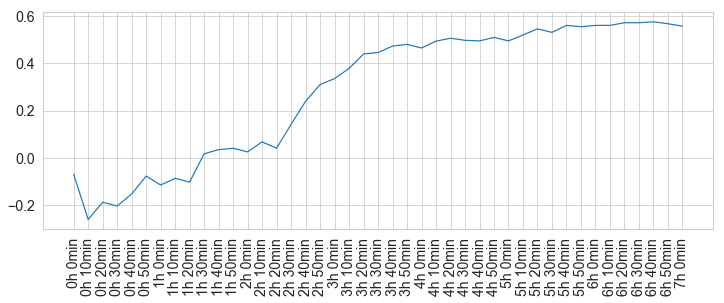

In [427]:
plt.figure(figsize=(12, 4))
ax = sns.lineplot(times[:43], [i[0] for i in sp])
plt.xticks(rotation=90);

In [428]:
std_df[['5h 20min',]]

,5h 20min
202,0.37
203,0.48
204,0.49
206,1.91
207,2.19
216,1.26
220,0.67
222,0.90
223,1.83
232,3.43


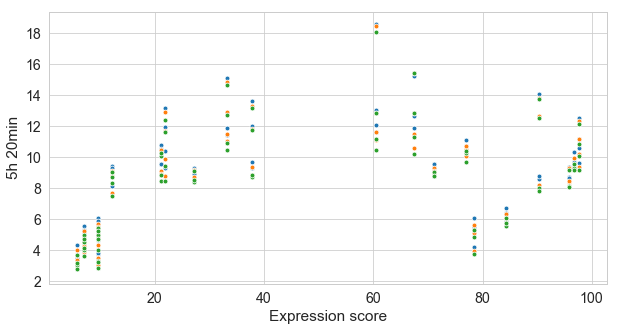

In [429]:
plt.figure(figsize=(10, 5))


for i in ['5h 0min', '5h 10min', '5h 20min']:
    ddd = pd.merge(all_map, pd.DataFrame(fl_df[i]).reset_index().explode(i), on='index')
    sns.scatterplot(data=ddd, x='Expression score', y=i, )

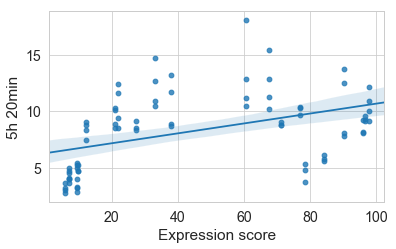

In [430]:
plt.figure(figsize=(6, 3.5))

ddd = pd.merge(all_map, pd.DataFrame(fl_df['5h 20min']).reset_index().explode('5h 20min'), on='index')
sns.regplot(data=ddd.astype(float), x='Expression score', y='5h 20min', )

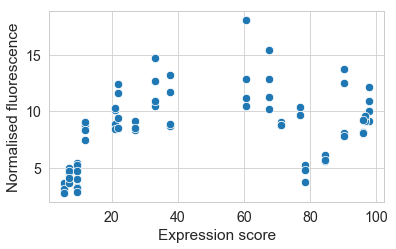

In [431]:
plt.figure(figsize=(6, 3.5))
sns.scatterplot(data=ddd.astype(float), x='Expression score', y='5h 20min', s=70)
plt.ylabel('Normalised fluorescence');

In [398]:
ddd.shape

(78, 3)

In [401]:
len(set(ddd['Expression score']))

20